<a href="https://colab.research.google.com/github/Anam2291/Deep_Learning_Projects/blob/main/Data_Augmentation_Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.04G/1.06G [00:04<00:00, 304MB/s]
100% 1.06G/1.06G [00:04<00:00, 261MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255)

In [28]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=216,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=216,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [29]:
model = Sequential()
# 1st Layer CNN
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # For Regularization

# 2nd Layer CNN
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd Layer CNN
model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512,activation='relu')) # Fully Connected Layers
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.6045 - loss: 3.6484 - val_accuracy: 0.5000 - val_loss: 1.1406
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.6928 - loss: 0.9752 - val_accuracy: 0.5000 - val_loss: 1.5531
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7451 - loss: 0.5532 - val_accuracy: 0.5000 - val_loss: 2.7826
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.7895 - loss: 0.4576 - val_accuracy: 0.5032 - val_loss: 2.3479
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8080 - loss: 0.4256 - val_accuracy: 0.6068 - val_loss: 1.5071
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8252 - loss: 0.3981 - val_accuracy: 0.6366 - val_loss: 1.0898
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8304 - loss: 0.3804 - val_accuracy: 0.7924 - val_loss: 0.5250
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8409 - loss: 0.3623 - val_accuracy: 0.7680 - v

In [32]:
history.history

{'accuracy': [0.6355500221252441,
  0.6999499797821045,
  0.7581999897956848,
  0.7889000177383423,
  0.8072999715805054,
  0.8187999725341797,
  0.8334500193595886,
  0.8407999873161316,
  0.8474500179290771,
  0.8510500192642212],
 'loss': [2.622636318206787,
  0.8281526565551758,
  0.5273422598838806,
  0.4622578024864197,
  0.4250379800796509,
  0.40838274359703064,
  0.37995797395706177,
  0.3652563691139221,
  0.3543599545955658,
  0.33864063024520874],
 'val_accuracy': [0.5,
  0.5,
  0.5,
  0.5031999945640564,
  0.6068000197410583,
  0.6366000175476074,
  0.7924000024795532,
  0.7680000066757202,
  0.7167999744415283,
  0.821399986743927],
 'val_loss': [1.140626311302185,
  1.553114891052246,
  2.7825512886047363,
  2.347919225692749,
  1.5070524215698242,
  1.089837908744812,
  0.5249995589256287,
  0.5864191651344299,
  1.0344659090042114,
  0.4415702223777771]}

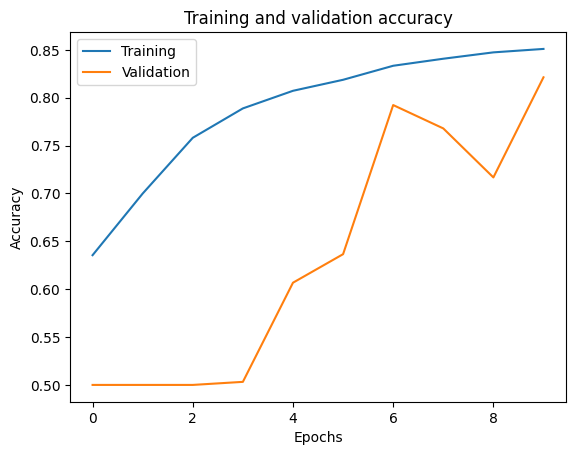

In [34]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'
plt.plot(history.history['accuracy'], label = "Training")
plt.plot(history.history['val_accuracy'], label = "Validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(['Training', 'Validation'])
plt.show()